In [1]:
### 편입 종목 ###
# 001440: 대한전선
# 006040: 동원산업
# 298020: 효성티앤씨
# 298050: 효성첨단소재
# 302440: SK바이오사이언스

### 편출 종목 ### 
# 005180: 빙그레
# 005610: SPC삼립
# 006390: 한일현대시멘트
# 008350: 남선알미늄
# 009410: 태영건설
# 018250: 애경산업
# 145990: 삼양사

### 증권사 편출 예상실패종목 ###
# 108670: LG하우시스
# 001060: JW중외제약
# 005610: SPC삼립
# 018250: 애경산업

In [14]:
import FinanceDataReader as fdr
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [44]:
# 편입종목 weight 설정 [KODEX 200, 2021-06-10 기준 weight 참고]
korea = 0.0013
dongwon = 0.0003
hyosung_tc = 0.0013
hyosung_tech = 0.0007
sk_bio = 0.0016

# 편출종목 weight 설정 [KODEX 200, 2021-04-21 기준 weight 참고]
bingre = 0.0003
spc = 0.0001
hanil = 0.0001
namsun = 0.0003
teayoung = 0.0002
aekyung = 0.0002
samyang = 0.0003

# 편출예상실패종목 weight 설정 [KODEX 200, 2021-04-21 기준 weight 참고]
lg = 0.0004

# 추가 예상실패 -> spc삼립, 애경산업

In [51]:
kos_in_list = ['001440', '006040', '298020', '298050', '302440']
kos_n_in_list = ['대한전선', '동원산업','효성티앤씨', '효성첨단소재','SK바이오사이언스']

kos_out_list = ['005180', '005610', '006390', '008350', '009410', '018250', '145990']
kos_n_out_list = ['빙그레', 'SPC삼립', '한일현대시멘트', '남선알미늄', '태영건설', '애경산업', '삼양사']

kos_fail_list = ['108670', '005610', '018250']
kos_n_fail_list = ['LG하우시스', 'SPC삼립', '애경산업']

total_list = kos_in_list + kos_out_list + kos_fail_list
total_n_list = kos_n_in_list + kos_n_out_list + kos_n_fail_list

real_list = kos_in_list + kos_out_list
real_n_list = kos_n_in_list + kos_n_out_list

In [52]:
close = pd.DataFrame()

for code, name in zip(total_list, total_n_list) :
    close[name] = fdr.DataReader(code, '2021')['Close']

In [56]:
kos_n_expect_out = kos_n_out_list + ['LG하우시스']
kos_n_expect_out.remove('SPC삼립')
kos_n_expect_out.remove('애경산업')

In [57]:
kos_n_expect_out

['빙그레', '한일현대시멘트', '남선알미늄', '태영건설', '삼양사', 'LG하우시스']

In [110]:
ret = close['2021-04-20':'2021-06-09'].pct_change().dropna()

In [111]:
ret_prod_w = pd.DataFrame()

In [112]:
ret_prod_w['대한전선'] = ret['대한전선'] * korea
ret_prod_w['동원산업'] = ret['동원산업'] * dongwon
ret_prod_w['효성티앤씨'] = ret['효성티앤씨'] * hyosung_tc
ret_prod_w['효성첨단소재'] = ret['효성첨단소재'] * hyosung_tech
ret_prod_w['SK바이오사이언스'] = ret['SK바이오사이언스'] * sk_bio
ret_prod_w['빙그레'] = ret['빙그레'] * bingre
ret_prod_w['SPC삼립'] = ret['SPC삼립'] * spc
ret_prod_w['한일현대시멘트'] = ret['한일현대시멘트'] * hanil
ret_prod_w['남선알미늄'] = ret['남선알미늄'] * namsun
ret_prod_w['태영건설'] = ret['태영건설'] * teayoung
ret_prod_w['애경산업'] = ret['애경산업'] * aekyung
ret_prod_w['삼양사'] = ret['삼양사'] * samyang
ret_prod_w['LG하우시스'] = ret['LG하우시스'] * lg

In [113]:
expect_in_num = len(ret_prod_w[kos_n_in_list].columns)
expect_in = (ret_prod_w[kos_n_in_list]).sum(axis=1)

expect_out_num = len(ret_prod_w[kos_n_in_list].columns)
expect_out = (ret_prod_w[kos_n_expect_out]).sum(axis=1)

sns.set_style('dark')

In [114]:
real_in = expect_in.copy()

real_out_num = len(ret_prod_w[kos_n_out_list].columns)
real_out = (ret_prod_w[kos_n_out_list]).sum(axis=1)

In [115]:
# expect strategy 
expect_strategy = (expect_in - expect_out)
real_strategy = (real_in - real_out)

In [116]:
total_ret = pd.DataFrame()
total_ret['expect_strategy'] = expect_strategy
total_ret['real_strategy'] = real_strategy

In [173]:
from matplotlib import rc
sns.set_style('dark')

rc('font', family='Nanumgothic')
plt.rcParams['axes.unicode_minus'] = False

In [178]:
total_ret_bp = (total_ret.add(1).cumprod() - 1) * 10000

Text(0, 0.5, '(누적 수익률, BP 기준)')

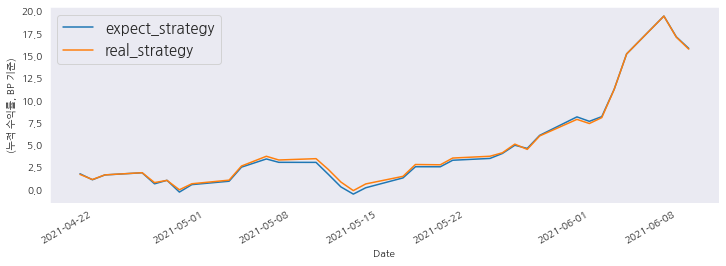

In [190]:
total_ret_bp.plot(figsize = (12,4))
plt.legend(loc=2, prop={'size': 15})
plt.ylabel('(누적 수익률, BP 기준)')

In [118]:
kos_n_in_list_k = ['동원산업', '효성티앤씨', '효성첨단소재', 'SK바이오사이언스']

In [119]:
expect_in_k = (ret_prod_w[kos_n_in_list_k]).sum(axis=1)
expect_out_k = (ret_prod_w[kos_n_expect_out]).sum(axis=1)
real_in_k = expect_in_k.copy()
real_out_k = (ret_prod_w[kos_n_out_list]).sum(axis=1)

In [120]:
indiv_in_out = pd.DataFrame()

indiv_in_out['expect_in_k=real_in_k'] = expect_in_k
indiv_in_out['expect_out_k'] = expect_out_k
indiv_in_out['real_out_k'] = real_out_k

In [163]:
indiv_in_out_cumret = indiv_in_out.add(1).cumprod()

In [164]:
indiv_in_out_cumret['1'] = 1

In [169]:
indiv_in_out_cumret_bp = (indiv_in_out_cumret - 1) * 10000

Text(0, 0.5, '(누적 수익률, BP 기준)')

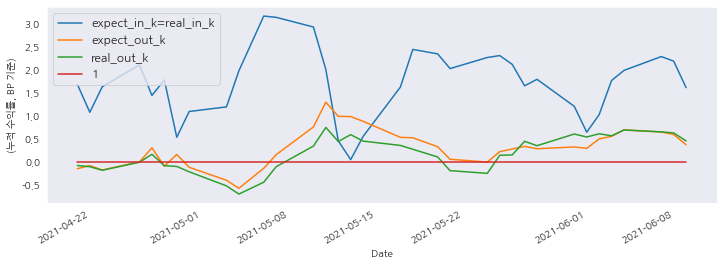

In [227]:
indiv_in_out_cumret_bp.plot(figsize = (12,4))
plt.legend(loc=2, prop={'size': 12})
plt.ylabel('(누적 수익률, BP 기준)')

In [192]:
expect_strategy_k = (expect_in_k - expect_out_k)
real_strategy_k = (real_in_k - real_out_k)

In [193]:
total_ret_k = pd.DataFrame()

total_ret_k['expect_strategy_except_k'] = expect_strategy_k
total_ret_k['real_strategy_except_k'] = real_strategy_k

In [197]:
total_ret_k_bp = (total_ret_k.add(1).cumprod() - 1) * 10000

Text(0, 0.5, '(누적 수익률, BP 기준)')

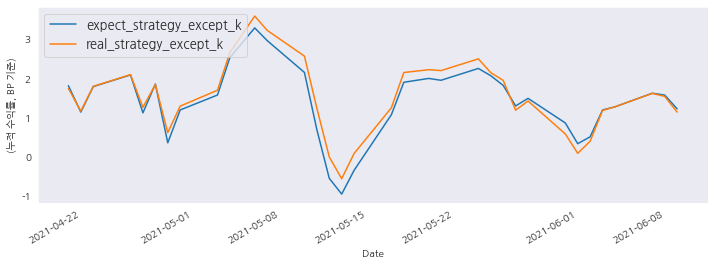

In [200]:
total_ret_k_bp.plot(figsize = (12,4))
plt.legend(loc=2, prop={'size': 13})
plt.ylabel('(누적 수익률, BP 기준)')

Text(0, 0.5, '(누적 수익률)')

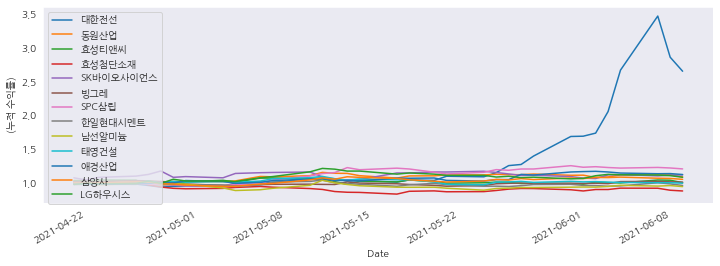

In [225]:
ret.add(1).cumprod().plot(figsize = (12,4))
plt.legend(loc=2, prop={'size': 10})
plt.ylabel('(누적 수익률)')

In [93]:
stock_borrow = pd.read_excel('./코스피200_정기변경_종목_대차잔액.xlsx')
stock_borrow = stock_borrow.iloc[1:-2,1:]

tmp_list = ['Date'] + real_n_list
stock_borrow.columns = tmp_list

stock_borrow['Date'] = stock_borrow['Date'].map(lambda x : x.replace('/', '-'))
stock_borrow = stock_borrow[::-1]
stock_borrow['Date'] = stock_borrow['Date'].map(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))
stock_borrow = stock_borrow.set_index('Date')
stock_borrow = stock_borrow['2021-04-21':]

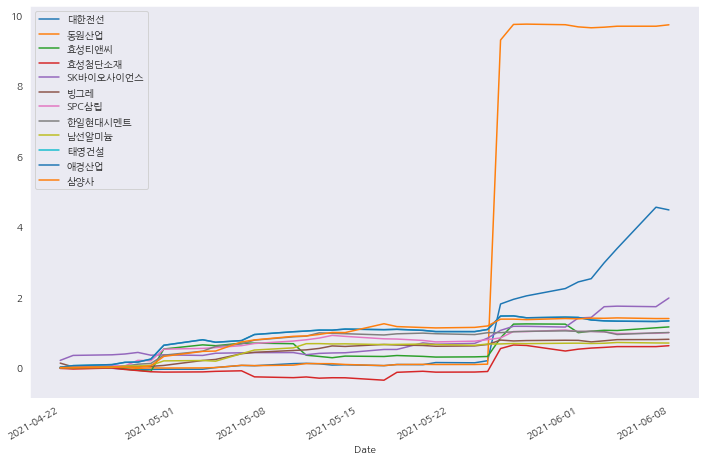

In [96]:
stock_borrow.pct_change().dropna().cumsum().plot(figsize = (12,8))

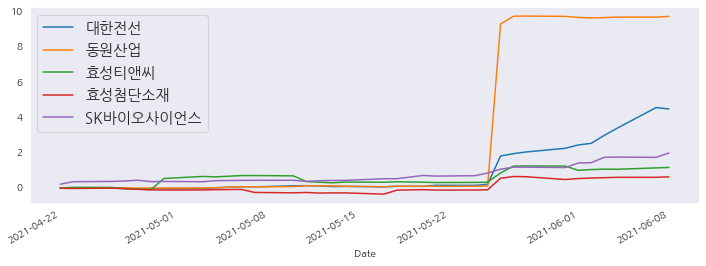

In [112]:
stock_borrow.iloc[:,:5].pct_change().dropna().cumsum().plot(figsize = (12,4))
plt.legend(loc=2, prop={'size': 15})

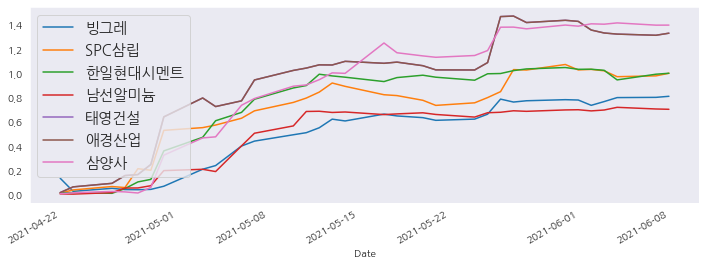

In [113]:
stock_borrow.iloc[:,5:].pct_change().dropna().cumsum().plot(figsize = (12,4))
plt.legend(loc=2, prop={'size': 15})

In [214]:
after_change = close['2021-06-09':][kos_n_in_list].pct_change().dropna()

Text(0, 0.5, '(누적 수익률)')

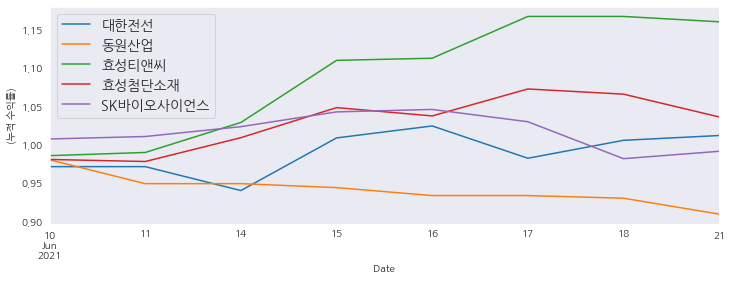

In [229]:
after_change.add(1).cumprod().plot(figsize = (12,4))
plt.legend(loc=2, prop={'size': 14})
plt.ylabel('(누적 수익률)')